In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\Alldata.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)

In [33]:
from sklearn.model_selection import ShuffleSplit
X = data.drop(columns=['Surface Segregation energy', 'System'],axis=1)
y = data['Surface Segregation energy']
rs = ShuffleSplit(n_splits=7, test_size=0.2, random_state=8)
rs.get_n_splits(X)
X_array = np.array(X)
y_array = np.array(y)

In [34]:
ytests = []
ypreds = []
ytrains = []
ypreds1 = []

for train_index, test_index in rs.split(X):
    X_train, X_test = X_array[train_index], X_array[test_index] #requires arrays
    y_train, y_test = y_array[train_index], y_array[test_index]

    model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=6)
    model.fit(X = X_train, y = y_train) 
    y_pred = model.predict(X_test)
    y_pred1 = model.predict(X_train)    
    # there is only one y-test and y-pred per iteration over the rs.split, 
    # so to get a proper graph, we append them to respective lists.
        
    ytests += list(y_test)
    ypreds += list(y_pred)
    
    ytrains += list(y_train)
    ypreds1 += list(y_pred1)
rr = metrics.r2_score(ytests, ypreds)
ms_error = metrics.mean_squared_error(ytests, ypreds)

print("Shuffle Shift Cross Validation")
print("R^2: {:.5f}%, MSE: {:.5f}".format(rr*100, ms_error))

Shuffle Shift Cross Validation
R^2: 88.37632%, MSE: 0.05048


In [35]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(ytests, ypreds)))

0.22468122195213563


In [36]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(ytrains, ypreds1)))

0.1259665968320253


In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytests, ypreds)

0.17446476516461712

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrains, ypreds1)

0.098872574172002

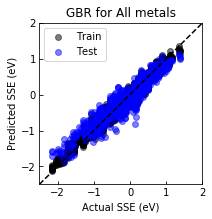

In [39]:
lineStart = min(ytests)
lineEnd = min(ypreds)  

plt.figure(figsize=(3,3))
plt.scatter(ytrains, ypreds1,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train')
plt.scatter(ytests,ypreds,
          c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test')

plt.title('GBR for All metals')
plt.tight_layout()
axes = plt.gca()
axes.set_xlim([-2.5,2])
axes.set_ylim([-2.5,2])

diag_line, = axes.plot(axes.get_xlim(), axes.get_ylim(), ls="--", c="black")
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")

plt.xlabel('Actual SSE (eV)')
plt.ylabel('Predicted SSE (eV)')

plt.legend(loc='upper left')
plt.savefig('GBR for All metalsCV.png', dpi=2000)

from PIL import Image, ImageEnhance 
im = Image.open("GBR for All metalsCV.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for All metalsCV enhanced.png")

In [40]:
rr = metrics.r2_score(ytrains, ypreds1)
rr

0.9604541170460081

In [41]:
rr = metrics.r2_score(ytests, ypreds)
rr

0.8837632419440904